In [169]:
#Linear Algebra
import numpy as np               

#Data Processing
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams



# figure size in inches
import seaborn as sns

#Machine Learning Algorithms
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [121]:
alc = pd.read_csv("C:\\winequality-red.csv")

In [122]:
alc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [123]:
alc.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [142]:
alc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
category                1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


# No Cleaning Required !

In [125]:
alc.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Here, I'll classify the wine quality as 'Poor', 'Bad', or 'Average'

In [126]:
quality = alc["quality"].values

classification = []

for i in quality:
    if i < 5:
        classification.append("POOR")
    elif i>=5 and i<6:
        classification.append("AVERAGE")
    else:
        classification.append("GOOD")

# Create a new data

In [127]:
classification = pd.DataFrame(data=classification,
                             columns=["category"])

alc = pd.concat([alc,classification],axis=1)

In [128]:
alc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,AVERAGE
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,AVERAGE
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE


# Phase_1 : Exploratory Data Analysis 

#  1.1 : Count Plot

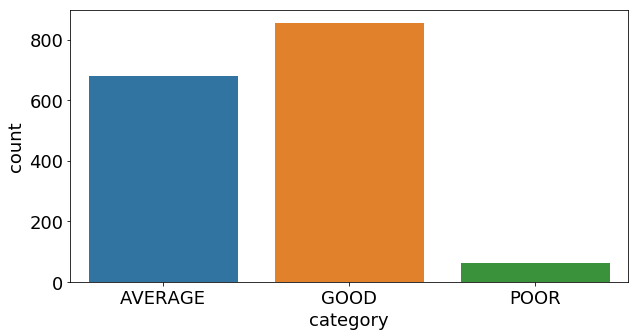

In [130]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})

sns.countplot(alc["category"])

plt.show()

In [72]:
alc["category"].value_counts()

GOOD       855
AVERAGE    681
POOR        63
Name: category, dtype: int64

# 1.2 : Correlation Heat Map to identify any relationships

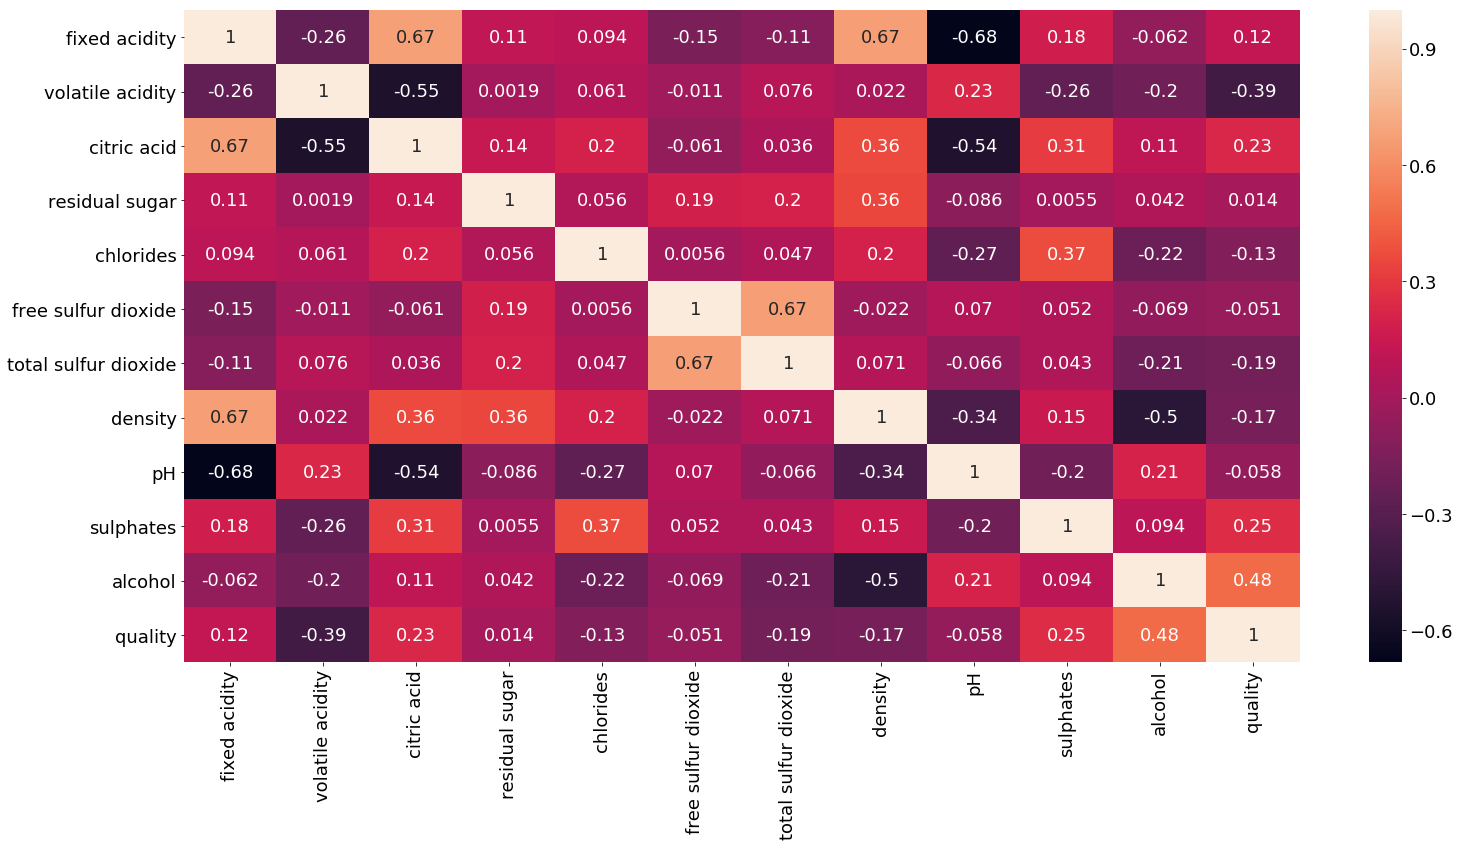

In [131]:
plt.figure(figsize=(25,12))
plt.rcParams.update({'font.size': 18})

sns.heatmap(data = alc.corr(),
           annot = True)

plt.show()

<Figure size 864x432 with 0 Axes>

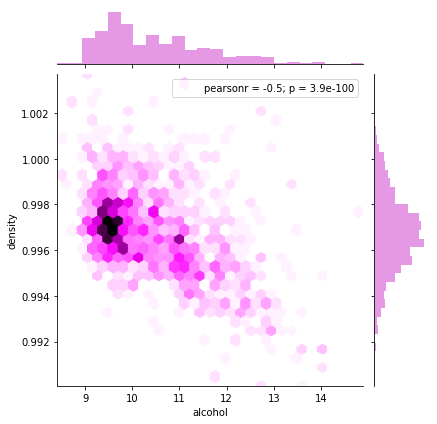

In [141]:
plt.figure(figsize=(12,6))
rcParams['figure.figsize']=12,6
plt.rcParams.update({'font.size': 10})
sns.jointplot(data=alc,
             x=alc["alcohol"],
             y=alc["density"],
             kind="hex",
             color="m")
plt.show()

# Phase_2 : Machine Learning

In [143]:
alc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,AVERAGE
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,AVERAGE
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE


In [145]:
alc_copy = alc

In [148]:
X = alc_copy.drop(["category"], axis = 1)

Y = alc_copy["category"]

# 2.1 : Data Preprocessing using LabelEncoder()

In [151]:
from sklearn.preprocessing import LabelEncoder

l_enc = LabelEncoder()

Y = l_enc.fit_transform(Y)

Y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# 2.2 : Train -> Test -> Split 

In [181]:
xtrain,xtest,ytrain,ytest = train_test_split(X,
                                             Y,
                                             test_size = 0.2,
                                             random_state = 0)

# 2.3 : Testing the Data

# 2.3.1 : Using LogisticRegression()

In [182]:
regressor_1 = LogisticRegression()

regressor_1.fit(xtrain, ytrain)

pred_1 = regressor_1.predict(xtest)

#accuracy_1 = accuracy_score(ytest, pred_1)

#classification_1 = classification_report(ytest, pred_1)

#confusmat_1 = confusion_matrix(ytest, pred_1)

print("Classification_Report : ")
print(classification_report(ytest,pred_1))
print("\n")
print("Confusion_Matrix : ")
print(confusion_matrix(ytest,pred_1))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(ytest,pred_1)*100,2))+" %, i.e the quality of red wine.")

Classification_Report : 
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       135
          1       1.00      1.00      1.00       172
          2       0.00      0.00      0.00        13

avg / total       0.92      0.96      0.94       320



Confusion_Matrix : 
[[135   0   0]
 [  0 172   0]
 [ 13   0   0]]


Accuracy Score = 95.94 %, i.e the quality of red wine.


# 2.3.2 : Using Support Vector Machines

In [193]:
support_2 = SVC()

support_2.fit(xtrain,ytrain)

pred_2 = support_2.predict(xtest)

print("Classification_Report : ")
print(classification_report(ytest,pred_2))
print("\n")
print("Confusion_Matrix : ")
print(confusion_matrix(ytest,pred_2))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(ytest,pred_2)*100,2))+" %, i.e the quality of red wine.")

Classification_Report : 
             precision    recall  f1-score   support

          0       0.78      0.92      0.84       135
          1       0.93      0.87      0.90       172
          2       0.00      0.00      0.00        13

avg / total       0.83      0.86      0.84       320



Confusion_Matrix : 
[[124  11   0]
 [ 22 150   0]
 [ 13   0   0]]


Accuracy Score = 85.62 %, i.e the quality of red wine.


# 2.3.3 : Using RandomForestClassifier

In [231]:
rfclass_3 = RandomForestClassifier()

rfclass_3.fit(xtrain,ytrain)

pred_3 = rfclass_3.predict(xtest)

print("Classification_Report : ")
print(classification_report(ytest,pred_3))
print("\n")
print("Confusion_Matrix : ")
print(confusion_matrix(ytest,pred_3))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(ytest,pred_3)*100,2))+" %, i.e the quality of red wine.")

Classification_Report : 
             precision    recall  f1-score   support

          0       0.97      1.00      0.99       135
          1       1.00      1.00      1.00       172
          2       1.00      0.69      0.82        13

avg / total       0.99      0.99      0.99       320



Confusion_Matrix : 
[[135   0   0]
 [  0 172   0]
 [  4   0   9]]


Accuracy Score = 98.75 %, i.e the quality of red wine.


# 2.3.4 : Using KNeighborsClassifier

In [186]:
knc_4 = KNeighborsClassifier()

knc_4.fit(xtrain,ytrain)

pred_4 = knc_4.predict(xtest)

print("Classification_Report : ")
print(classification_report(ytest,pred_4))
print("\n")
print("Confusion_Matrix : ")
print(confusion_matrix(ytest,pred_4))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(ytest,pred_4)*100,2))+" %, i.e the quality of red wine.")

Classification_Report : 
             precision    recall  f1-score   support

          0       0.60      0.71      0.65       135
          1       0.76      0.70      0.73       172
          2       0.00      0.00      0.00        13

avg / total       0.66      0.68      0.67       320



Confusion_Matrix : 
[[ 96  39   0]
 [ 51 121   0]
 [ 13   0   0]]


Accuracy Score = 67.81 %, i.e the quality of red wine.


# 2.3.5 : Using AdaBoostClassifier

In [256]:
ABClass_5 = AdaBoostClassifier()

ABClass_5.fit(xtrain,ytrain)

pred_5 = ABClass_5.predict(xtest)

print("Classification_Report : ")
print(classification_report(ytest,pred_5))
print("\n")
print("Confusion_Matrix : ")
print(confusion_matrix(ytest,pred_5))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(ytest,pred_5)*100,2))+" %, i.e the quality of red wine.")

Classification_Report : 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       135
          1       1.00      1.00      1.00       172
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00       320



Confusion_Matrix : 
[[135   0   0]
 [  0 172   0]
 [  0   0  13]]


Accuracy Score = 100.0 %, i.e the quality of red wine.


# Results :

In [265]:
summary = pd.DataFrame({"Model_Used" : ["LogisticRegression","SVC","RandomForest","KNN","AdaBoostClassifier"],
                       "AccuracyScore (in %)": [round(accuracy_score(ytest,pred_1)*100,2),
                                         round(accuracy_score(ytest,pred_2)*100,2),
                                         round(accuracy_score(ytest,pred_3)*100,2),
                                         round(accuracy_score(ytest,pred_4)*100,2),
                                         round(accuracy_score(ytest,pred_5)*100,2)]})
summary

,Model_Used,AccuracyScore (in %)
0,LogisticRegression,95.94
1,SVC,85.62
2,RandomForest,98.75
3,KNN,67.81
4,AdaBoostClassifier,100.00
